In [282]:
from prody import *
from pylab import *
from prody.utilities import showFigure, addEnds
import pandas as pd
import numpy as np

In [271]:
ion()
%matplotlib inline

In [272]:
def showSqFlucts2(modes, *args, **kwargs):
    """Show square fluctuations using :func:`~matplotlib.pyplot.plot`.  See
    also :func:`.calcSqFlucts`."""
    
    import matplotlib.pyplot as plt
    show_hinge = kwargs.pop('hinge', False)
   
    sqf = calcSqFlucts(modes)
    
    
    if not 'label' in kwargs:
        kwargs['label'] = str(modes)
    
    atoms = kwargs.get('atoms', None)
    
    show = showAtomicLines(sqf, *args, atoms=atoms, **kwargs)
    
    
    plt.ylabel('Square fluctuations')
    plt.title(str(modes))
    if show_hinge and not modes.is3d():
        hinges = modes.getHinges()
        
        if hinges is not None:
            plt.plot(hinges, sqf[hinges], 'r*')
            
    
    
    showFigure()
    
    return sqf

In [273]:
'''
important links: 
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5108658/
http://www.rcsb.org/structure/4MNF, http://www.rcsb.org/structure/5JRQ, 
http://www.rcsb.org/structure/4RZW, https://www.rcsb.org/structure/4WO5
'''

'\nimportant links: \nhttps://www.ncbi.nlm.nih.gov/pmc/articles/PMC5108658/\nhttp://www.rcsb.org/structure/4MNF, http://www.rcsb.org/structure/5JRQ, \nhttp://www.rcsb.org/structure/4RZW, https://www.rcsb.org/structure/4WO5\n'

In [274]:
class protein(object):
    
    def __init__(self, protein_name):
        self.protein_name = protein_name
        self.protein = ""
        self.protein_anm = ""
        self.protein_ca = ""
    def calc_flucts(self):
        protein_name = self.protein_name
        
    
        # Parse the proteins from PDB
        self.protein = parsePDB(protein_name)
        protein = self.protein
        # Select only the Calpha atoms for simulation
        protein_ca = protein.ca 
        self.protein_ca = protein.ca 
        
        # Prepare the ANM simulation
        self.protein_anm = ANM('protein_ca')
        # Build the Hessian matrix
        self.protein_anm.buildHessian(protein_ca)
        # Calculate the modes, save only the first three
        self.protein_anm.calcModes(n_modes=3)
        
    def show_prot(self):
        showProtein(self.protein);
        
    def plot_flucts(self):
        # Plot the squared fluctuations
        flucts_data = showSqFlucts2(self.protein_anm)
        x = range(len(flucts_data)+1)[1:]
        return [x, flucts_data]
        
    def write_tofile(self,filename):
        # Write the NMD file for further evaluation
        writeNMD(filename, self.protein_anm, self.protein_ca)

In [275]:
BRAF_gdc0879 = protein("4MNF") # Crystal structure of BRAF-V600E bound to GDC0879
BRAF_vem6vem = protein("5JRQ") # BRAFV600E Kinase Domain In Complex with Chemically Linked Vemurafenib Inhibitor VEM-6-VEM
BRAF_AZ628 = protein("4RZW") # Crystal structure of BRAF (R509H) kinase domain bound to AZ628
BRAF_wt = protein("4WO5") # Crystal structure of a BRAF kinase domain monomer

In [276]:
BRAF_gdc0879.calc_flucts()
BRAF_vem6vem.calc_flucts()
BRAF_AZ628.calc_flucts()
BRAF_wt.calc_flucts()


@> PDB file is found in working directory (4mnf.pdb.gz).
@> 4249 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Hessian was built in 0.15s.
@> 3 modes were calculated in 0.22s.
@> PDB file is found in working directory (5jrq.pdb.gz).
@> 4177 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Hessian was built in 0.19s.
@> 3 modes were calculated in 0.19s.
@> PDB file is found in working directory (4rzw.pdb.gz).
@> 4100 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Hessian was built in 0.16s.
@> 3 modes were calculated in 0.26s.
@> PDB file is found in working directory (4wo5.pdb.gz).
@> 4109 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> Hessian was built in 0.20s.
@> 3 modes were calculated in 0.22s.


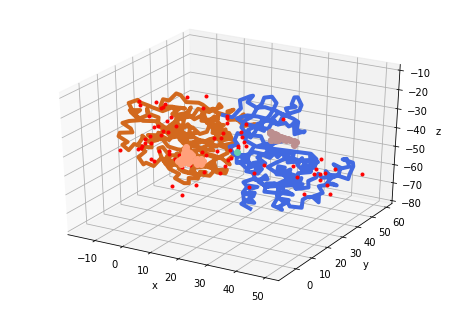

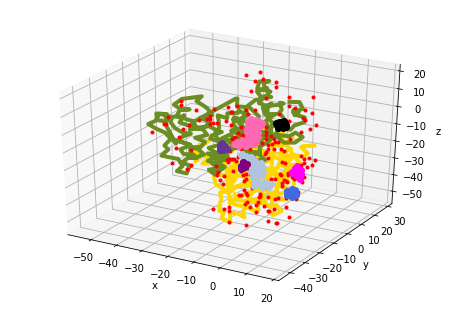

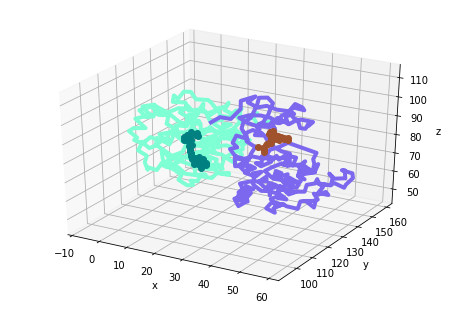

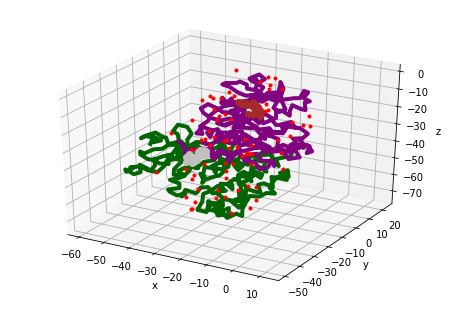

In [277]:
BRAF_gdc0879.show_prot()
BRAF_vem6vem.show_prot()
BRAF_AZ628.show_prot()
BRAF_wt.show_prot()

In [279]:
BRAF_gdc0879.write_tofile("gdc0879.nmd")
BRAF_vem6vem.write_tofile("gdc0879.nmd")
BRAF_AZ628.write_tofile("gdc0879.nmd")
BRAF_wt.write_tofile("gdc0879.nmd")

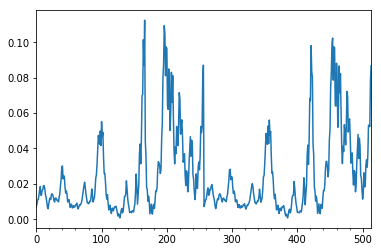

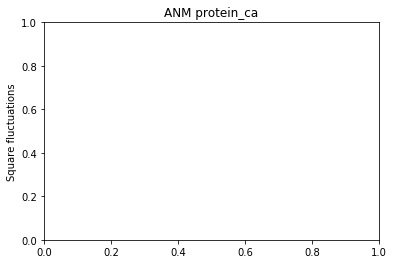

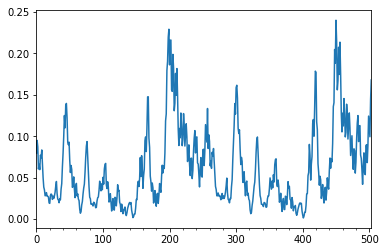

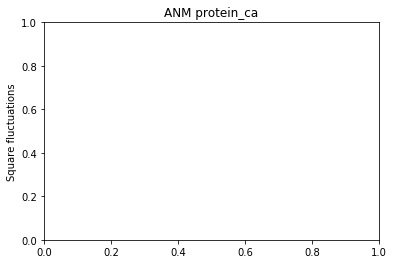

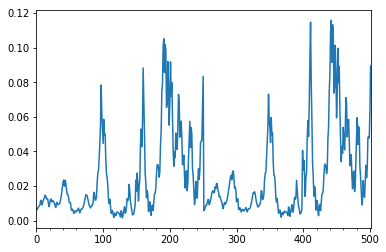

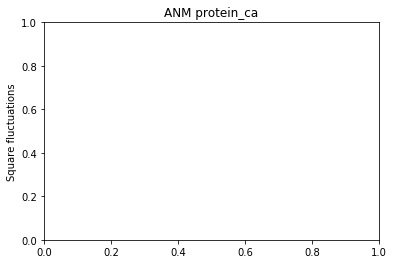

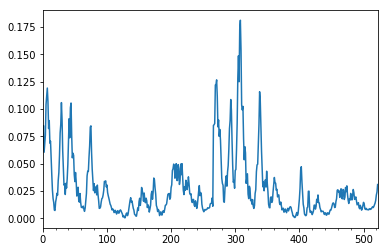

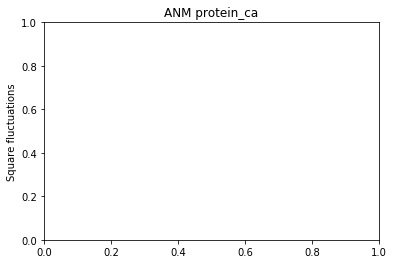

In [281]:
BRAF_gdc0879_fluct = BRAF_gdc0879.plot_flucts()
BRAF_vem6vem_fluct = BRAF_vem6vem.plot_flucts()
BRAF_AZ628_fluct = BRAF_AZ628.plot_flucts()
BRAF_wt_fluct = BRAF_wt.plot_flucts()

In [289]:
df = pd.DataFrame({'x':BRAF_gdc0879_fluct[0], 'y':BRAF_gdc0879_fluct[1]})
df.to_csv("BRAF_gdc0879.csv", index=False)

df = pd.DataFrame({'x':BRAF_vem6vem_fluct[0], 'y':BRAF_vem6vem_fluct[1]})
df.to_csv("BRAF_vem6vem.csv", index=False)

df = pd.DataFrame({'x':BRAF_AZ628_fluct[0], 'y':BRAF_AZ628_fluct[1]})
df.to_csv("BRAF_AZ628.csv", index=False)

df = pd.DataFrame({'x':BRAF_wt_fluct[0], 'y':BRAF_wt_fluct[1]})
df.to_csv("BRAF_wt.csv", index=False)